In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_44/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Descenso gradiente

Vamos a usar el dataset de propiedades en Boston (https://www.kaggle.com/c/boston-housing) y tratar de predecir el valor de `medv` usando una regresión lineal múltiple.

Para eso, vamos a modificar la clase `MyGradientDescent` presentada en el encuentro sincrónico y usarla para entrenar un modelo de regresión lineal múltiple y uno simple.

Ayuda: 

<p style="font-size:16px;">
$h =  \beta_0 + \beta_1. X_1 + \beta_2. X_2 + \beta_3. X_3 + ... + \beta_m. X_m$
</p>

i es el índice de la fila en el dataset

<p style="font-size:16px;">
$h_i =  \beta_0 + \beta_1. X_{i1} + \beta_2. X_{i2} + \beta_3. X_{i3} + ... + \beta_m. X_{im}$
</p>    
<p style="font-size:16px;">
$\beta_0 = \beta_0 - \alpha \frac{1}{m} \sum (h_i - y_i)$
</p>    
<p style="font-size:16px;">
$\beta_i = \beta_i - \alpha \frac{1}{m} \sum (h_i - y_i). X_i$
</p>    

Costo (error cuadrático medio): 
<p style="font-size:16px;">    
$J(\beta_0, ..., \beta_m) = \frac{1}{N} \sum_{i=1}^N (h_i - y_i)^2  $
</p>
Gradiente: 

<p style="font-size:16px;">    
$\frac{\partial J(\beta_0, ..., \beta_m)}{\partial \beta_j} = \frac{2}{N} \sum_{i=1}^N (h_i - y_i). X_{ij} $
</p>    

N es el número de observaciones o filas del dataset

Entonces 

$\beta_0 = \beta_0 - \alpha .\frac{2}{N} \sum_{i=1}^N (h_i - y_i). X_{i0}$

como $X_{i0} = 1$ queda:

$\beta_0 = \beta_0 - \alpha .\frac{2}{N} \sum_{i=1}^N (h_i - y_i)$

$\beta_1 = \beta_1 - \alpha .\frac{2}{N} \sum_{i=1}^N (h_i - y_i). X_{i1}$

$\beta_2 = \beta_2 - \alpha .\frac{2}{N} \sum_{i=1}^N (h_i - y_i). X_{i2}$

... 

$\beta_j = \beta_j - \alpha .\frac{2}{N} \sum_{i=1}^N (h_i - y_i). X_{ij}$


$\alpha$ = Learning Rate

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Ejercicio 1

Leer los datos del archivo `Data/boston_data.csv` en un dataframe y construir un heatmap de correlaciones entre sus columnas

In [5]:
df = pd.read_csv('../Data/boston_data.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


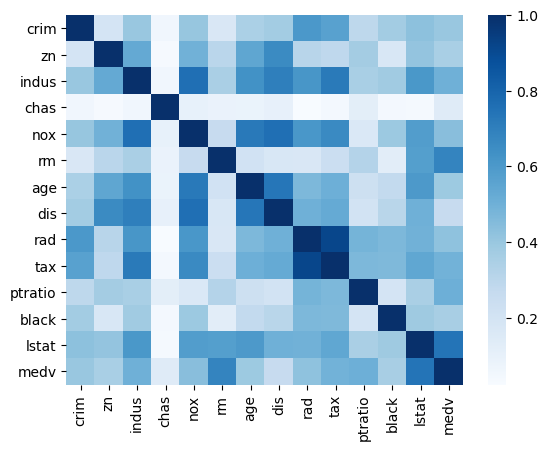

In [17]:
sns.heatmap(data = abs(df.corr()), annot=False, fmt='4f',cmap='Blues')
plt.show()

## Ejercicio 2 

La variable target del modelo es `medv`.

Seleccionar como variables predictoras las tres variables que tengan mayor correlación (en valor absoluto) con la variable target.

Construir los conjuntos de train y test y normalizar las features.

In [26]:
abs(df.corr(method='spearman')['medv']).sort_values(ascending = False)[:4]

medv     1.000000
lstat    0.844794
rm       0.630316
indus    0.589243
Name: medv, dtype: float64

In [28]:
X = df[['lstat','rm','indus']]
y = df.medv


X_train, X_test, y_train, y_test=train_test_split(X, y, random_state = 1203)

In [29]:
esc = StandardScaler()

X_train_esc = esc.fit_transform(X_train)
X_test_esc = esc.transform(X_test)

## Ejercicio 3

Modificar la clase `MyGradientDescent` presentada en el encuentro sincrónico para resolver ahora una regresión **múltiple** usando descenso gradiente.

```

class MyGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.beta1 = 0
        self.beta0 = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            for i in range(N):
                Xi = X[i, :]
                yi = y.iloc[i]                 
                
                hi = self.beta1 * Xi + self.beta0
                f = hi - yi
                
                self.beta1 -= self.learning_rate * 2 / N * f * Xi
                self.beta0 -= self.learning_rate * 2 / N * f 

            loss = 0
            loss = mean_squared_error(y, (self.beta1 * X + self.beta0))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.beta1 * X + self.beta0


```

Tener en cuenta las fórmulas presentadas en la ayuda al inicio de la notebook.

In [39]:
class MyGradientDescentMultiple():
    def __init__(self, learning_rate, n):
        self.learning_rate = learning_rate
        self.betas = np.repeat(0, n) # tantos 0 como betas
        self.beta0 = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        n = X.shape[1] # Obtengo la cantidad de coeficientes, segun la cantidad de features
        
        for e in range(epochs):
            
            gradiente_0 = 0 # gradiente de Beta 0
            gradiente = np.repeat(0, n) #gradiente de los betas  #vector de ceros
            
            for i in range(N):
                Xi = X[i, :]
                yi = y.iloc[i]                 
                
                # multiplico el valor de la observacion(Xi) * el valor del
                # coeficiente beta correspondiente a cada feature
                hi = np.dot(Xi, self.betas) + self.beta0  
                
                gradiente = gradiente + (hi - yi) * Xi
                gradiente_0 = gradiente_0 + (hi - yi)
                
                self.beta0 = self.beta0 - self.learning_rate * 2 / N * gradiente_0 
                self.betas = self.betas - self.learning_rate * 2 / N * gradiente 


            pred = np.dot(X, self.betas) + self.beta0
            loss = mean_squared_error(y, pred)
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return np.dot(X, self.betas) + self.beta0


## Ejercicio 4

Entrenar la regresión lineal múltiple con tres variables predictoras (seleccionadas en el ejercicio 2) usando la clase que definieron en el ejercicio 3.

Evaluar la performance en test mediante el error cuadrático medio.

In [48]:
mgd=MyGradientDescentMultiple(0.01, 3)

In [49]:
history = mgd.fit(X_train_esc, y_train)

Epoch: 0, Loss: 398.10250809007806)


In [50]:
history

[398.10250809007806,
 269.2217158322429,
 193.72046102780618,
 134.7179317753501,
 102.28796472236856,
 74.94337804826145,
 61.352770973322734,
 48.486140146453835,
 43.00818183331041,
 36.81959569009638,
 34.76248938247623,
 31.69977308947928,
 31.038001614380576,
 29.468977602599274,
 29.3435184805054,
 28.507744421288315,
 28.564578905775207,
 28.100873428863707,
 28.20127134844024,
 27.933687791784628,
 28.02844007537687,
 27.86851771214417,
 27.944071439124198,
 27.84566003006351,
 27.90154562584889,
 27.839580186638198,
 27.879295862045037,
 27.839601241025058,
 27.867175203696803,
 27.841427941018463,
 27.860300620656812,
 27.84345232877581,
 27.856253516754776,
 27.84516091656777,
 27.853793580874438,
 27.84645981414413,
 27.85225938238509,
 27.847396950486882,
 27.851283520735144,
 27.84805345328856,
 27.850653756862037,
 27.84850529153186,
 27.850243127189692,
 27.848812852812813,
 27.84997344348386,
 27.849020733913594,
 27.849795445731942,
 27.849160599365824,
 27.849677565

In [54]:
predictions = mgd.predict(X_test_esc)
predictions

array([ 9.47690529, 21.7053452 , 18.68429968, 32.92871764, 19.97966833,
       16.47717136, 23.50833665, 25.66105533, 27.01255045, 27.28966045,
       27.72089185, 21.5465033 , 18.04865493, 24.46456989, 29.04449387,
       17.94754861, 30.27672099, 26.54421723, 20.33725036, 29.56272806,
       26.86817151, 18.9407628 , 28.88477418, 19.35022035, 22.92043375,
       19.02467862,  6.49320158, 21.85638182, 18.01963726, 18.82412307,
       30.03515437, 26.21947206, 27.1028045 , 15.50229993, 23.74488254,
       25.76830198, 16.82221027, 21.42219686, 38.69345074, 30.86738267,
       25.45006273, 37.30683225, 20.15150999, 16.73423359, 18.0116767 ,
       31.34799474, 20.14949648, 22.76058745, 23.2472438 , 36.38613851,
       24.39310494, 21.7823274 , 25.53185714, 33.07932358, 26.32399602,
       30.66536421, 24.75183085, 19.45015366, 15.24476267, 20.32700715,
       34.78394666, 24.2574492 ,  1.66369175, 16.04132807, 21.39987452,
       32.8123658 , 29.46783972, 21.95266579, 23.35312046, 14.17

In [55]:
mean_squared_error(y_test, predictions)

26.08405495248997

## Ejercicio 5

Graficar el valor de pérdida en función de las épocas

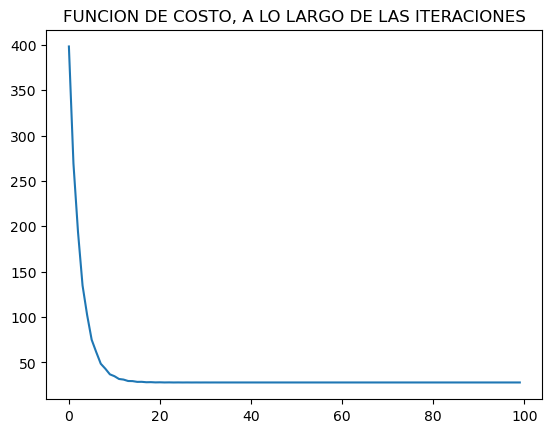

In [58]:
sns.lineplot(x = range(len(history)), y = history)
plt.title('FUNCION DE COSTO, A LO LARGO DE LAS ITERACIONES')
plt.show()

## Ejercicio 6

Usar la misma clase del ejercicio 3 para ajustar una regresión lineal simple cuya variable predictora sea `lstat` y comprobar el resultado obtenido es el mismo que con `MyGradientDescent`

Graficar en un scatterplot los datos de test y los predichos por el modelo.

In [60]:
model_simple = MyGradientDescentMultiple(learning_rate = 0.01, m = 1)
history = model_simple.fit(X_train_scl, y_train, 1000)

predictions = model_simple.predict(X_test_esc)

NameError: name 'MyGradientDescentMultiple' is not defined

In [ ]:
print(model_simple.betas)
print(model_simple.beta0)

In [ ]:
mean_squared_error(y_test, predictions)

In [ ]:
sns.lineplot(x = range(len(history)), y = history);

In [ ]:
sns.scatterplot(x = X_test_scl[:, 0], y = y_test )
sns.lineplot(x = X_test_scl[:, 0], y = predictions, color="orange");

Ahora veamos que devuelve `MyGradientDescent`

In [ ]:
class MyGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.beta1 = 0
        self.beta0 = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            for i in range(N):
                Xi = X[i, :]
                yi = y.iloc[i] 
                
                hi = self.beta1 * Xi + self.beta0
                f = hi - yi
                
                self.beta1 -= self.learning_rate * 2 / N * f * Xi
                self.beta0 -= self.learning_rate * 2 / N * f 

            loss = 0
            loss = mean_squared_error(y, (self.beta1 * X + self.beta0))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.beta1 * X + self.beta0

In [ ]:
model_lineal_simple = MyGradientDescent(learning_rate = 0.01)
history = model_lineal_simple.fit(X_train_esc, y_train, 1000)

predictions = model_lineal_simple.predict(X_test_esc)

In [ ]:
mean_squared_error(y_test, predictions)

## Ejercicio 7 - Opcional

Intenten entrenar un modelo con cinco variables predictoras. 

Posiblemente tengan que probar distintos valores de learning rate para conseguir resultados aceptables.

## Conclusión

Implementando de forma más general la clase `MyGradientDescent` logramos usar el mismo código para resolver regresiones lineales simples y múltiples con descenso gradiente.

## Referencias

---

https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
